<a href="https://colab.research.google.com/github/theMorana/HSE/blob/main/Machine_Learning/Semester_2_Homeworks/Hometask__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ДОМАШНЕЕ ЗАДАНИЕ

### **Задача:** повторите туториал на датасете **Iris**

**Датасет Iris:**
- 150 примеров цветков ириса
- 3 вида (Setosa, Versicolor, Virginica)
- 4 признака (длина/ширина чашелистика и лепестка)

### **Требования:**
1. **часть 1-2: анализ данных**
   - загрузите датасет `sklearn.datasets.load_iris()`
   - создайте 2 графика распределения классов
   - визуализируйте данные в 2D (выберите 2 любых признака)

2. **часть 3-5: подготовка и обучение**
   - разделите данные 70/30 с `stratify`
   - масштабируйте признаки
   - обучите SVM с линейным ядром

3. **часть 6: эксперименты**
   - попробуйте 3 разных значения C: 0.1, 1, 10
   - сравните accuracy каждой модели
   - выберите лучшую

4. **часть 7-8: оценка**
   - постройте матрицу ошибок для лучшей модели
   - вычислите precision, recall, F1-score
   - найдите и проанализируйте 2 примера ошибок

5. **часть 9: анализ**
   - постройте кривую обучения
   - ответьте: модель переобучается или недообучается?
   - что можно улучшить?

### **Формат сдачи:**
- **Colab ноутбук** с выполненным кодом
- **краткий отчет** (3-5 предложений) с выводами:
  - какая точность достигнута?
  - на каких классах чаще ошибается модель?
  - какие параметры SVM сработали лучше всего?

### **Критерии оценки:**
1. корректная загрузка и анализ данных
2. правильное разделение и масштабирование
3. обучение SVM с разными параметрами (показать, что вы делали как минимум 2 прогона с разными гиперпараметрами, 1 прогон даёт 1 балл)
4. визуализация матрицы ошибок
5. вычисление метрик precision, recall, F1
6. построение кривой обучения
7. представлены ответы на все вопросы из списка требований

### **Дедлайн:** 14 февраля, 23:59 в свои учебные репозитории

#Часть 1 - 2

In [ ]:
# установка необходимых библиотек
!pip install numpy pandas matplotlib seaborn scikit-learn

# импорт
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# загружаем датасет
iris = datasets.load_iris()
X = iris.data  # 4 признака - длина/ширина чашелистика и лепестка
y = iris.target  # классы (0, 1, 2 - виды цветов)
feature_names = iris.feature_names
target_names = iris.target_names

print(f"размер данных: {X.shape}")
print(f"количество классов: {len(np.unique(y))}")
print(f"названия классов: {target_names}")
print(f"признаки: {feature_names}")

размер данных: (150, 4)
количество классов: 3
названия классов: ['setosa' 'versicolor' 'virginica']
признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
'''
print(iris)
'''

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['iris_type'] = df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

# первые 5 строк
print(df.head())

# базовая статистика
print(df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target iris_type  
0       0   class_0  
1       0   class_0  
2       0   class_0  
3       0   class_0  
4       0   class_0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%

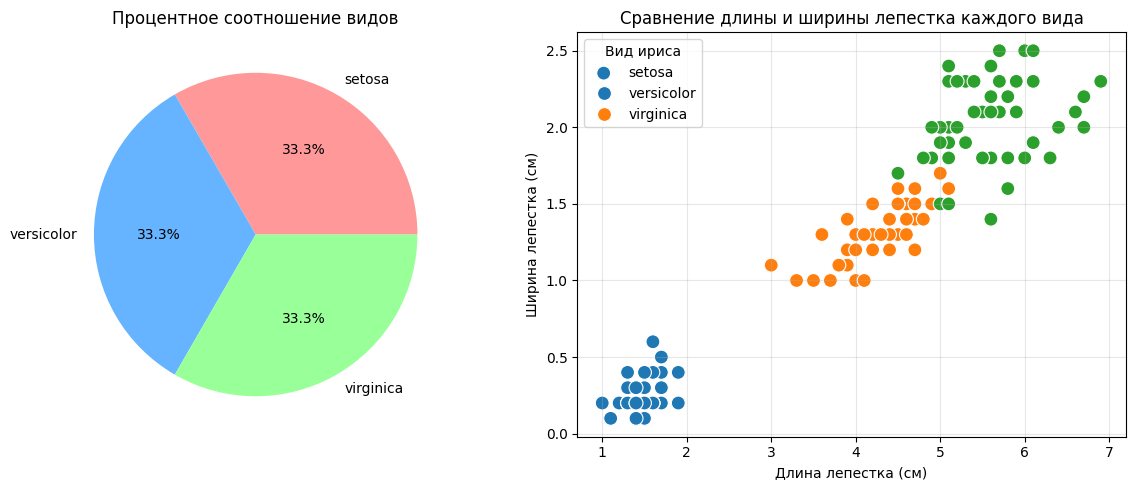

In [ ]:
# круговая диаграмма
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_counts = df['target'].value_counts()
plt.pie(class_counts, labels=target_names, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Процентное соотношение видов')

#гистограмма - показывает, что классы
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,
                x='petal length (cm)',
                y='petal width (cm)',
                hue='iris_type',
                s=100)
plt.title('Сравнение длины и ширины лепестка каждого вида')
plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.legend(title='Вид ириса',
           labels=['setosa', 'versicolor', 'virginica'])
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

#Часть 3 - 5


In [ ]:
# разделяем данные (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"train size: {X_train.shape}")
print(f"test size: {X_test.shape}")
print(f"train class distribution: {np.bincount(y_train)}")
print(f"test class distribution: {np.bincount(y_test)}")

train size: (105, 4)
test size: (45, 4)
train class distribution: [35 35 35]
test class distribution: [15 15 15]


In [ ]:
#масштабирование

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

'''
print("пример до масштабирования (первые 3 признака):")
print(X_train[0, :3])
print("\nпример после масштабирования (первые 3 признака):")
print(X_train_scaled[0, :3])
'''

#проверка на ошибки, правильно ли высчитываются значения
'''
print("Среднее после масштабирования:", X_train_scaled.mean(axis=0))
print("Стандартное отклонение:", X_train_scaled.std(axis=0))
'''



'\nprint("Среднее после масштабирования:", X_train_scaled.mean(axis=0))\nprint("Стандартное отклонение:", X_train_scaled.std(axis=0))\n'

In [ ]:
# создаем и обучаем модель
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# предсказания
y_pred_linear = svm_linear.predict(X_test_scaled)

# оценка
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"линейный SVM accuracy: {accuracy_linear:.2%}")
print("\nclassification report:")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

линейный SVM accuracy: 91.11%

classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



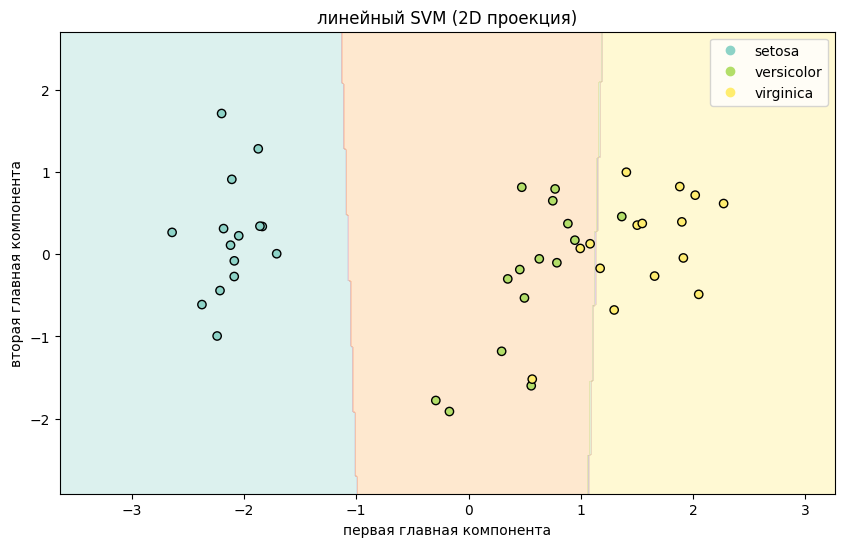

In [ ]:
# используем PCA для уменьшения до 2D для визуализации
from sklearn.decomposition import PCA #от 3д к 2д - principal component - снижает размерность
#без учителя, для тематического моделирования, для рекомендательных систем

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# создаем сетку для границы
def plot_decision_boundary_2d(model, X, y, title):
    h = .02  # шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # предсказание для каждой точки сетки
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set3')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set3')
    plt.xlabel('первая главная компонента')
    plt.ylabel('вторая главная компонента')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=list(target_names))
    plt.show()

plot_decision_boundary_2d(svm_linear, X_test_pca, y_test, "линейный SVM (2D проекция)")

In [ ]:
# SVM с RBF ядром)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM accuracy: {accuracy_rbf:.2%}")

RBF SVM accuracy: 93.33%


#Часть 6

C=0.01: accuracy = 86.67%
C=0.1: accuracy = 86.67%
C=1: accuracy = 93.33%
C=10: accuracy = 93.33%


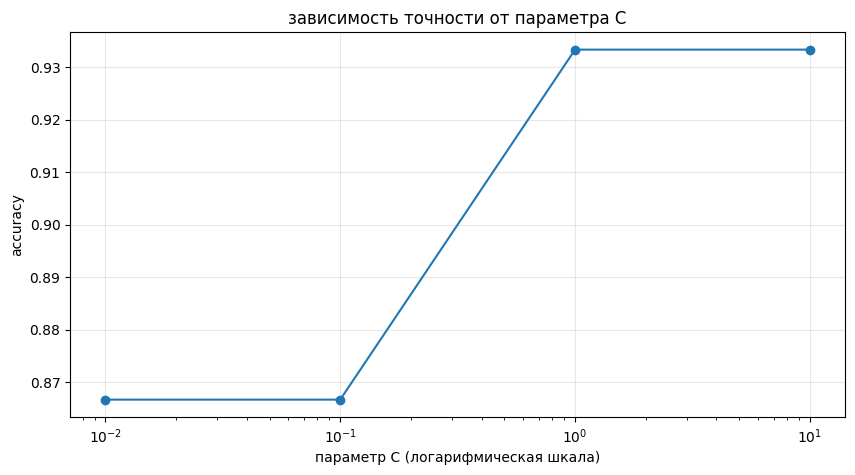

In [ ]:
# пробуем разные значения C
C_values = [0.01, 0.1, 1, 10]
accuracies = []

for C in C_values:
    svm_temp = SVC(kernel='rbf', C=C, random_state=42)
    svm_temp.fit(X_train_scaled, y_train)
    acc = svm_temp.score(X_test_scaled, y_test)
    accuracies.append(acc)
    print(f"C={C}: accuracy = {acc:.2%}")

# график зависимости accuracy от C
plt.figure(figsize=(10, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('параметр C (логарифмическая шкала)')
plt.ylabel('accuracy')
plt.title('зависимость точности от параметра C')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# используем найденные лучшие параметры
best_svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
best_svm.fit(X_train_scaled, y_train)

y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"лучшая SVM accuracy: {accuracy_best:.2%}")

лучшая SVM accuracy: 93.33%


#Часть 7-8

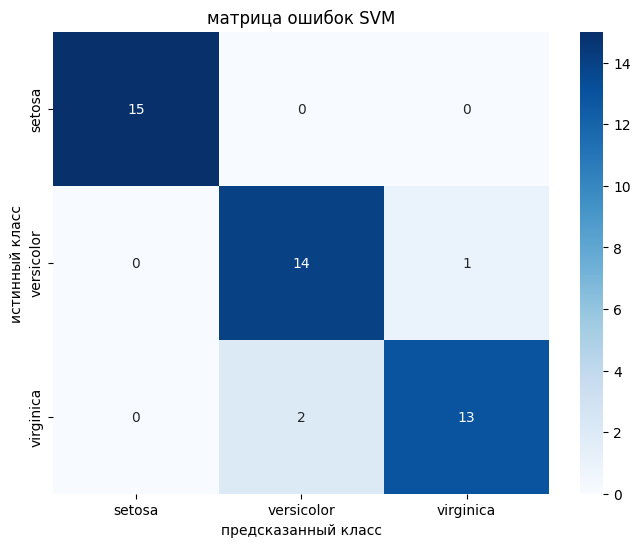

In [ ]:
# вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred_best)

# визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('предсказанный класс')
plt.ylabel('истинный класс')
plt.title('матрица ошибок SVM')
plt.show()

In [ ]:
print("детальный отчет по классификации:")
print(classification_report(y_test, y_pred_best, target_names=target_names))

# вычисляем дополнительные метрики вручную
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"\nитоговые метрики:")
print(f"precision: {precision:.2%}  # точность (сколько из предсказанных правильные)")
print(f"recall:    {recall:.2%}    # полнота (сколько из реальных нашли)")
print(f"F1-score:  {f1:.2%}     # баланс precision и recall")

детальный отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


итоговые метрики:
precision: 93.45%  # точность (сколько из предсказанных правильные)
recall:    93.33%    # полнота (сколько из реальных нашли)
F1-score:  93.33%     # баланс precision и recall


In [ ]:
# находим индексы ошибок
error_indices = np.where(y_pred_best != y_test)[0]

print(f"количество ошибок: {len(error_indices)}")

if len(error_indices) > 0:
    print("\nпримеры ошибок:")

    for i, idx in enumerate(error_indices[:3]):  # покажем первые 3
        print(f"\nошибка {i+1}:")
        print(f"  истинный класс: {target_names[y_test[idx]]}")
        print(f"  предсказанный:  {target_names[y_pred_best[idx]]}")
        print(f"  вероятности классов: {best_svm.decision_function(X_test_scaled[idx:idx+1])}")

количество ошибок: 3

примеры ошибок:

ошибка 1:
  истинный класс: virginica
  предсказанный:  versicolor
  вероятности классов: [[-0.23222733  2.20414076  1.13916713]]

ошибка 2:
  истинный класс: virginica
  предсказанный:  versicolor
  вероятности классов: [[-0.22960759  2.18724266  1.16079295]]

ошибка 3:
  истинный класс: versicolor
  предсказанный:  virginica
  вероятности классов: [[-0.22919805  1.15483972  2.1904854 ]]


In [ ]:
print(f"количество support vectors: {len(best_svm.support_vectors_)}")
print(f"количество support vectors по классам: {best_svm.n_support_}")
print(f"процент точек, являющихся support vectors: {len(best_svm.support_vectors_)/len(X_train):.1%}")

количество support vectors: 27
количество support vectors по классам: [ 6 10 11]
процент точек, являющихся support vectors: 25.7%


#Часть 9

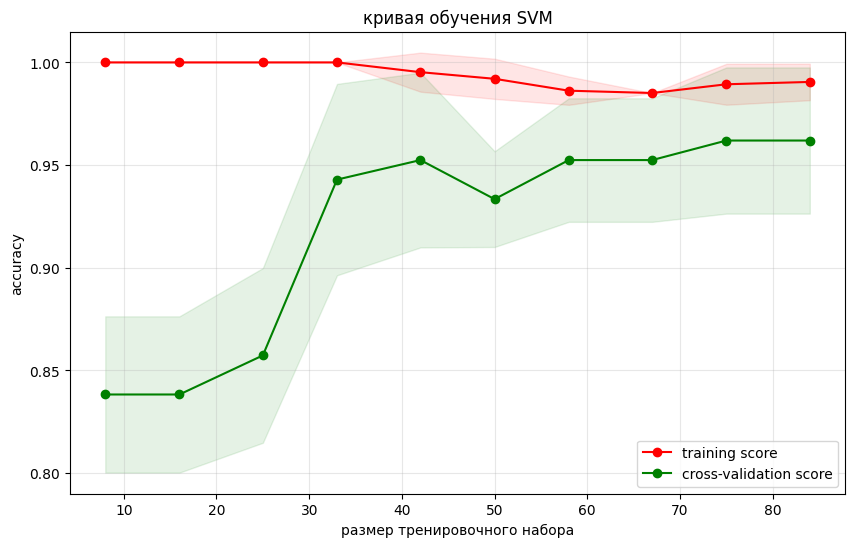

In [ ]:
from sklearn.model_selection import learning_curve

# вычисляем learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# средние значения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# график
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('размер тренировочного набора')
plt.ylabel('accuracy')
plt.title('кривая обучения SVM')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

Вывод: согласно графику, кривые в итоге выравниваются, что означает, что модель сбалансирована.



#Выводы


Были получены следующие результаты:


1.   Accuracy = 93.33%
2.   precision: 93.45%  # точность
3.   recall:    93.33%    # полнота
4.   F1-score:  93.33%     # баланс precision и recall



Ошибки сработали на двух классах: versicolor и virginica (преположительно из-за схожести в размерах лепестков).

Улучшения:

*   Увеличить количество тестовых даннных
*   Можно попробовать поэкспериментировать с параметром gamma, но осторожно, чтобы не было переобучения

